Python Pandas tutorial
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

In [3]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# 1.1 Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [4]:
broken_df = pd.read_csv('../data/bikes.csv')

In [5]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [6]:
fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [7]:
fixed_df['Berri 1']

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
2012-01-06    146
2012-01-07     98
2012-01-08     95
2012-01-09    244
2012-01-10    397
2012-01-11    273
2012-01-12    157
2012-01-13     75
2012-01-14     32
2012-01-15     54
...
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10-28    1310
2012-10-29    2919
2012-10-30    2887
2012-10-31    2634
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
complaints = pd.read_csv('../data/311-service-requests.csv')

/opt/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1070: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

# 2.1 What's even in it? (the summary)

When you print a large dataframe, it will only show you the first few rows.

If you don't see this, don't panic! The default behavior for large dataframes changed between pandas 0.12 and 0.13. Previous to 0.13 it would show you a summary of the dataframe. This includes all the columns, and how many non-null values there are in each column.

In [3]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948,212540,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

# 2.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [4]:
complaints['Complaint Type']

0      Noise - Street/Sidewalk
1              Illegal Parking
2           Noise - Commercial
3              Noise - Vehicle
4                       Rodent
5           Noise - Commercial
6             Blocked Driveway
7           Noise - Commercial
8           Noise - Commercial
9           Noise - Commercial
10    Noise - House of Worship
11          Noise - Commercial
12             Illegal Parking
13             Noise - Vehicle
14                      Rodent
...
111054    Noise - Street/Sidewalk
111055         Noise - Commercial
111056      Street Sign - Missing
111057                      Noise
111058         Noise - Commercial
111059    Noise - Street/Sidewalk
111060                      Noise
111061         Noise - Commercial
111062               Water System
111063               Water System
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type,

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [5]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [6]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [7]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 2.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [8]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [9]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 2.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [10]:
complaints['Complaint Type'].value_counts()

HEATING                     14200
GENERAL CONSTRUCTION         7471
Street Light Condition       7117
DOF Literature Request       5797
PLUMBING                     5373
PAINT - PLASTER              5149
Blocked Driveway             4590
NONCONST                     3998
Street Condition             3473
Illegal Parking              3343
Noise                        3321
Traffic Signal Condition     3145
Dirty Conditions             2653
Water System                 2636
Noise - Commercial           2578
...
Opinion for the Mayor                2
Window Guard                         2
DFTA Literature Request              2
Legal Services Provider Complaint    2
Open Flame Permit                    1
Snow                                 1
Municipal Parking Facility           1
X-Ray Machine/Equipment              1
Stalled Sites                        1
DHS Income Savings Requirement       1
Tunnel Condition                     1
Highway Sign - Damaged               1
Ferry Permit      

If we just wanted the top 10 most common complaints, we can do this:

In [11]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
dtype: int64

But it gets better! We can plot them!

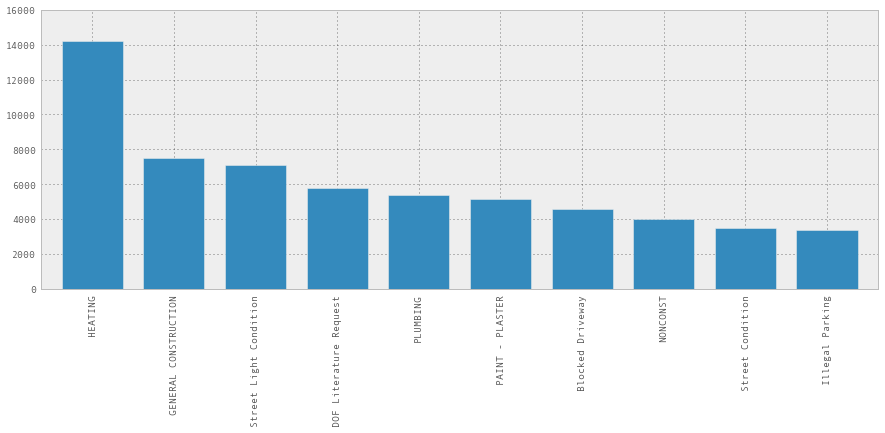

In [12]:
complaint_counts[:10].plot(kind='bar')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

In [11]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)


# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Let's continue with our NYC 311 service requests example.

In [12]:
complaints = pd.read_csv('../data/311-service-requests.csv')

# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [13]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [14]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013,171076,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577,140964,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [15]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [16]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937,170310,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366,180388,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925,203271,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895,171051,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144,173511,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


Or if we just wanted a few columns:

In [17]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


# 3.2 A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [18]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [19]:
np.array([1,2,3])

array([1, 2, 3])

In [20]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [21]:
arr = np.array([1,2,3])

In [22]:
arr != 2

array([ True, False,  True], dtype=bool)

In [23]:
arr[arr != 2]

array([1, 3])

# 3.3 So, which borough has the most noise complaints?

In [24]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [25]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [26]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
dtype: float64

Oops, why was that zero? That's no good. This is because of integer division in Python 2. Let's fix it, by converting `complaint_counts` into an array of floats.

In [27]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
dtype: float64

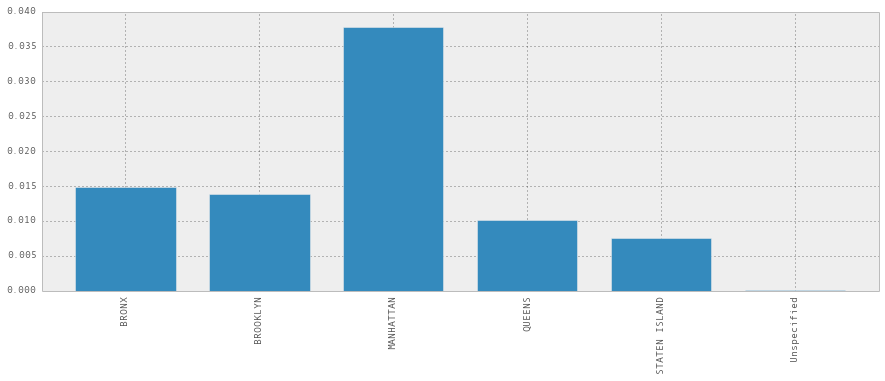

In [28]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Okay! We're going back to our bike path dataset here. I live in Montreal, and I was curious about whether we're more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

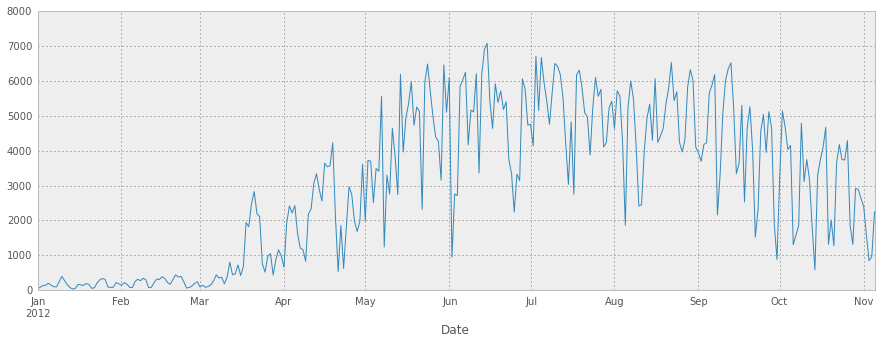

In [2]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path. I use it mostly on my way to the library now, but I used to take it to work sometimes when I worked in Old Montreal. 

So we're going to create a dataframe with just the Berri bikepath in it

In [3]:
berri_bikes = bikes[['Berri 1']].copy()

In [4]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [5]:
berri_bikes.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-01-01, ..., 2012-11-05]
Length: 310, Freq: None, Timezone: None

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [6]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

We actually want the weekday, though:

In [7]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [8]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [9]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [10]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


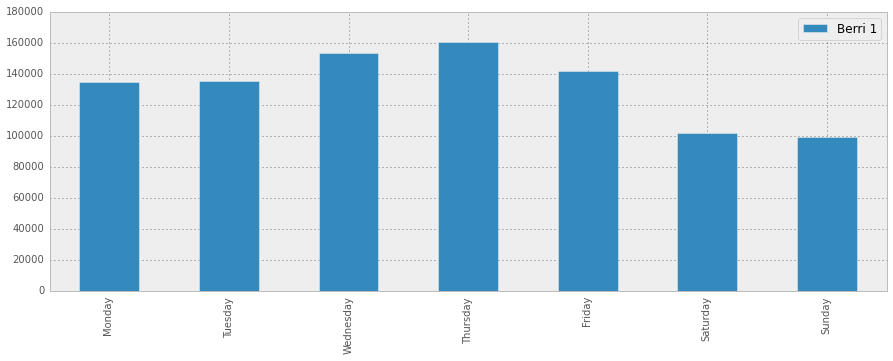

In [11]:
weekday_counts.plot(kind='bar')

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.

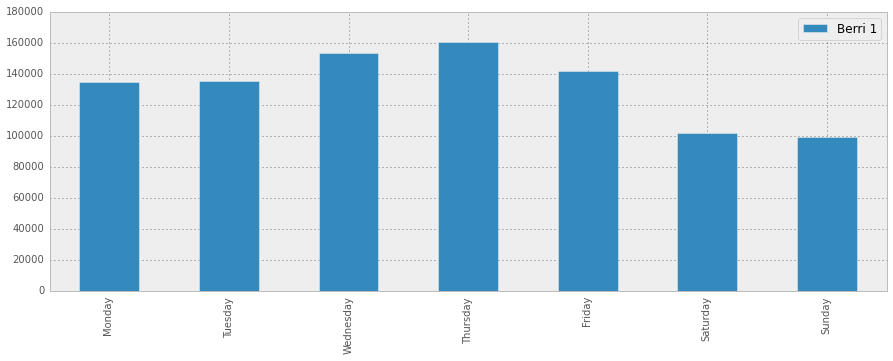

In [12]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# Summary

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

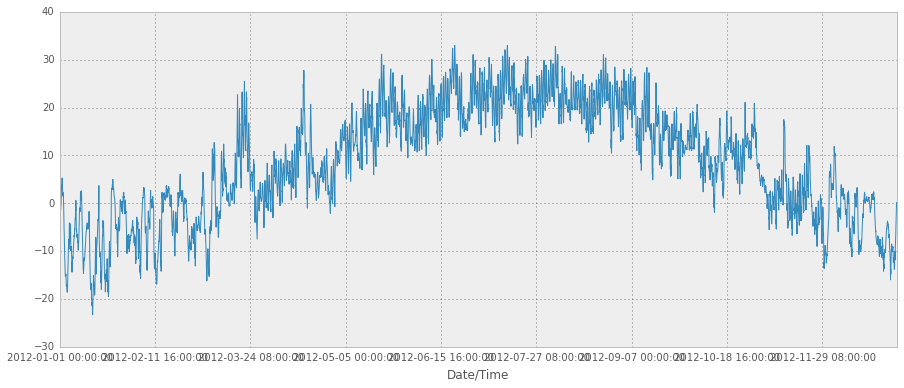

In [2]:
weather_2012_final = pd.read_csv('../data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

# 5.1 Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for [Canadian historical weather data](http://climate.weather.gc.ca/index_e.html#access), and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal. 

In [3]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

To get the data for March 2013, we need to format it with `month=3, year=2012`.

In [4]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)

This is super great! We can just use the same `read_csv` function as before, and just give it a URL as a filename. Awesome.

There are 16 rows of metadata at the top of this CSV, but pandas knows CSVs are weird, so there's a `skiprows` options. We parse the dates again, and set 'Date/Time' to be the index column. Here's the resulting dataframe.

In [5]:
weather_mar2012

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 05:00:00,2012,3,1,05:00,,-5.3,NaN,-7.9,NaN,82,...,NaN,2.4,NaN,100.58,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 06:00:00,2012,3,1,06:00,,-5.2,NaN,-7.8,NaN,82,...,NaN,4.0,NaN,100.57,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 07:00:00,2012,3,1,07:00,,-4.9,NaN,-7.4,NaN,83,...,NaN,1.6,NaN,100.59,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 08:00:00,2012,3,1,08:00,,-5.0,NaN,-7.5,NaN,83,...,NaN,1.2,NaN,100.59,NaN,NaN,NaN,-13,NaN,Snow


Let's plot it!

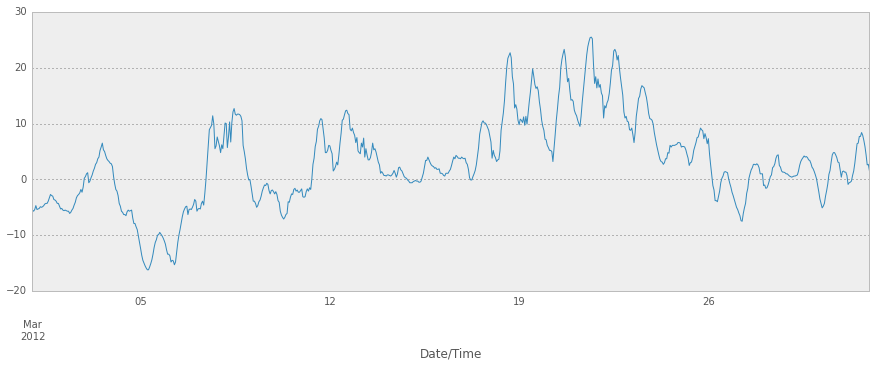

In [6]:
weather_mar2012[u"Temp (\xc2\xb0C)"].plot(figsize=(15, 5))

Notice how it goes up to 25° C in the middle there? That was a big deal. It was March, and people were wearing shorts outside. 

And I was out of town and I missed it. Still sad, humans.

I had to write `'\xb0'` for that degree character °. Let's fix up the columns. We're going to just print them out, copy, and fix them up by hand.

In [7]:
weather_mar2012.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with `dropna`.

The argument `axis=1` to `dropna` means "drop columns", not rows", and `how='any'` means "drop the column if any value is null". 

This is much better now -- we only have columns with real data.

In [8]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Year,Month,Day,Time,Data Quality,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,-7.8,83,35,1.6,100.62,Snow


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The `axis=1` argument means "Drop columns", like before. The default for operations like `dropna` and `drop` is always to operate on rows.

In [9]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
weather_mar2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Awesome! We now only have the relevant columns, and it's much more manageable.

# 2.3 Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method DataFrame.head of                      Temp (C)
Date/Time                    
2012-03-01 00:00:00      -5.5
2012-03-01 01:00:00      -5.7
2012-03-01 02:00:00      -5.4
2012-03-01 03:00:00      -4.7
2012-03-01 04:00:00      -5.4
2012-03-01 05:00:00      -5.3
2012-03-01 06:00:00      -5.2
2012-03-01 07:00:00      -4.9
2012-03-01 08:00:00      -5.0
2012-03-01 09:00:00      -4.9
2012-03-01 10:00:00      -4.7
2012-03-01 11:00:00      -4.4
2012-03-01 12:00:00      -4.3
2012-03-01 13:00:00      -4.3
2012-03-01 14:00:00      -3.9
2012-03-01 15:00:00      -3.3
2012-03-01 16:00:00      -2.7
2012-03-01 17:00:00      -2.9
2012-03-01 18:00:00      -3.0
2012-03-01 19:00:00      -3.6
2012-03-01 20:00:00      -3.7
2012-03-01 21:00:00      -3.9
2012-03-01 22:00:00      -4.3
2012-03-01 23:00:00      -4.3
2012-03-02 00:00:00      -4.8
2012-03-02 01:00:00      -5.3
2012-03-02 02:00:00      -5.2
2012-03-02 03:00:00      -5.5
2012-03-02 04:00:00      -5.6
2012-03-02 05:00:00      -5.5
...     

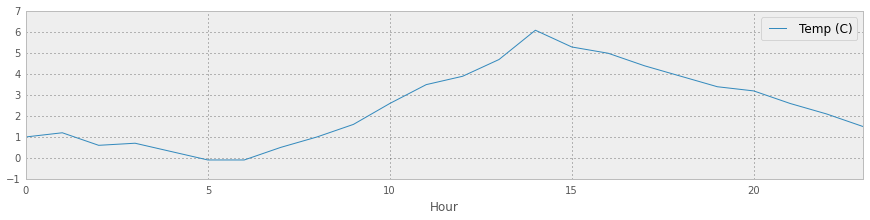

In [10]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

# 5.3 Getting the whole year of data

Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month. 

I noticed that there's an irritating bug where when I ask for January, it gives me data for the previous year, so we'll fix that too. [no, really. You can check =)]

In [11]:
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, header=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

We can test that this function does the right thing:

In [12]:
download_weather_month(2012, 1)[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2013-01-01 00:00:00,-1.0,-1.7,95,35,6.4,99.89,Snow
2013-01-01 01:00:00,-2.0,-5.1,79,35,16.1,99.93,Mainly Clear
2013-01-01 02:00:00,-2.7,-6.0,78,28,19.3,100.08,Snow
2013-01-01 03:00:00,-5.6,-11.7,62,30,25.0,100.21,Clear
2013-01-01 04:00:00,-7.7,-12.6,68,35,19.3,100.32,Mainly Clear


Now we can get all the months at once. This will take a little while to run.

In [13]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using `pd.concat`. And now we have the whole year's data!

In [14]:
weather_2012 = pd.concat(data_by_month)
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2013-01-01 00:00:00,-1.0,-1.7,95,35,6.4,99.89,Snow
2013-01-01 01:00:00,-2.0,-5.1,79,35,16.1,99.93,Mainly Clear
2013-01-01 02:00:00,-2.7,-6.0,78,28,19.3,100.08,Snow
2013-01-01 03:00:00,-5.6,-11.7,62,30,25.0,100.21,Clear
2013-01-01 04:00:00,-7.7,-12.6,68,35,19.3,100.32,Mainly Clear
2013-01-01 05:00:00,-9.7,-14.8,66,33,25.0,100.47,Clear
2013-01-01 06:00:00,-11.1,-17.0,62,30,25.0,100.65,Clear
2013-01-01 07:00:00,-12.2,-17.2,66,20,25.0,100.78,Clear
2013-01-01 08:00:00,-13.0,-17.7,68,13,24.1,100.87,Clear


# 5.4 Saving to a CSV

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [15]:
weather_2012.to_csv('../data/weather_2012.csv')

And we're done!

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings! We're going to go back to our weather data from Chapter 5, here.

In [8]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 6.1 String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

In [9]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

In [10]:
# Not super useful
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

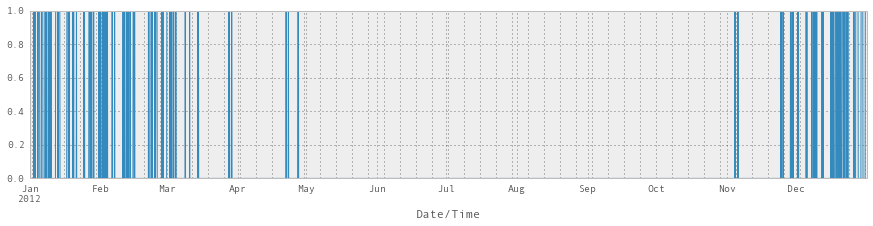

In [11]:
# More useful!
is_snowing.plot()

# 6.2 Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()` method like this:

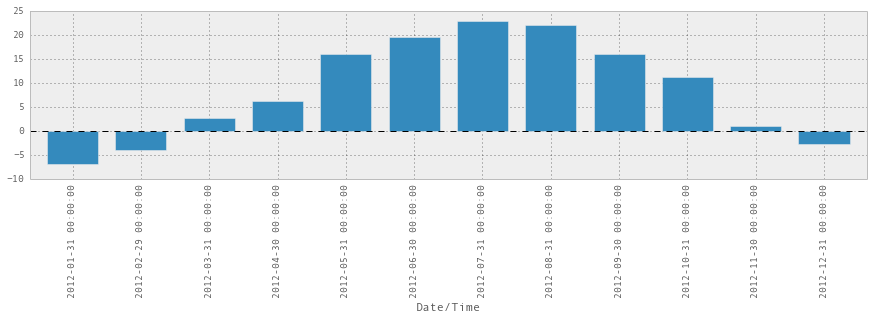

In [12]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:

In [13]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
2012-01-01 05:00:00    0
2012-01-01 06:00:00    0
2012-01-01 07:00:00    0
2012-01-01 08:00:00    0
2012-01-01 09:00:00    0
Name: Weather, dtype: float64

and then use `resample` to find the percentage of time it was snowing each month

In [14]:
is_snowing.astype(float).resample('M', how=np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

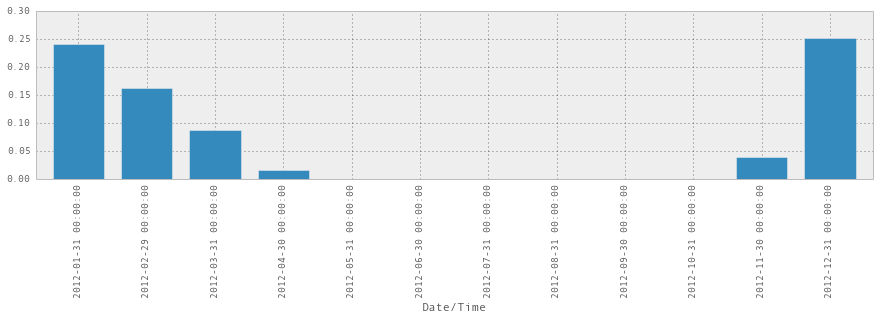

In [15]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

# 6.3 Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [16]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [17]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000
2012-10-31,11.30,0.000000


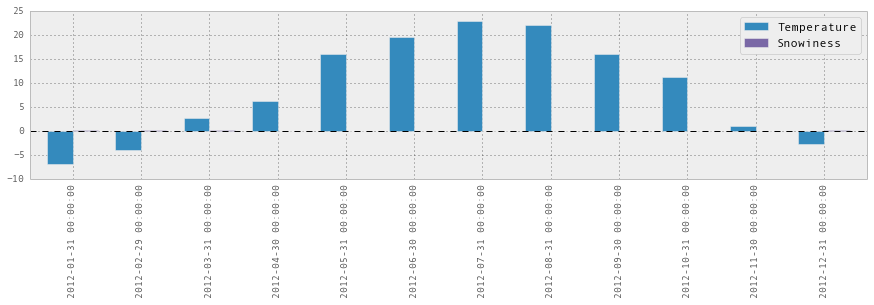

In [18]:
stats.plot(kind='bar')

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:

array([<matplotlib.axes.AxesSubplot object at 0x10c268650>,
       <matplotlib.axes.AxesSubplot object at 0x10c7c1390>], dtype=object)

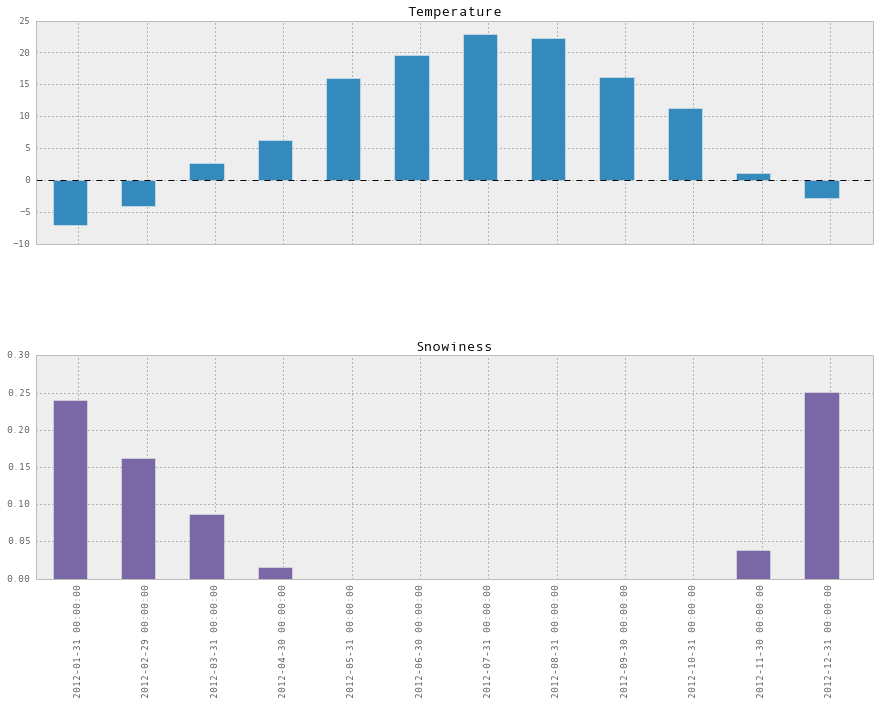

In [19]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

In [37]:
# The usual preamble
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

One of the main problems with messy data is: how do you know if it's messy or not?

We're going to use the NYC 311 service request dataset again here, since it's big and a bit unwieldy.

In [38]:
requests = pd.read_csv('../data/311-service-requests.csv')

# 7.1 How do we know if it's messy? 

We're going to look at a few columns here. I know already that there are some problems with the zip code, so let's look at that first.
 
To get a sense for whether a column has problems, I usually use `.unique()` to look at all its values. If it's a numeric column, I'll instead plot a histogram to get a sense of the distribution.

When we look at the unique values in "Incident Zip", it quickly becomes clear that this is a mess.

Some of the problems:

* Some have been parsed as strings, and some as floats
* There are `nan`s 
* Some of the zip codes are `29616-0759` or `83`
* There are some N/A values that pandas didn't recognize, like 'N/A' and 'NO CLUE'

What we can do:

* Normalize 'N/A' and 'NO CLUE' into regular nan values
* Look at what's up with the 83, and decide what to do
* Make everything strings

In [39]:
requests['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

# 7.3 Fixing the nan values and string/float confusion

We can pass a `na_values` option to `pd.read_csv` to clean this up a little bit. We can also specify that the type of Incident Zip is a string, not a float.

In [40]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('../data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

In [41]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

# 7.4 What's up with the dashes?

In [42]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

5

In [43]:
requests[rows_with_dashes]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
29136,26550551,10/24/2013 06:16:34 PM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,False Advertising,NaN,77092-2016,2700 EAST SELTICE WAY,EAST SELTICE WAY,NaN,NaN,NaN,NaN,NaN,HOUSTON,NaN,NaN,Assigned,11/13/2013 11:15:20 AM,10/29/2013 11:16:16 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30939,26548831,10/24/2013 09:35:10 AM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,55164-0737,P.O. BOX 64437,64437,NaN,NaN,NaN,NaN,NaN,ST. PAUL,NaN,NaN,Assigned,11/13/2013 02:30:21 PM,10/29/2013 02:31:06 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70539,26488417,10/15/2013 03:40:33 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,11549-3650,365 HOFSTRA UNIVERSITY,HOFSTRA UNIVERSITY,NaN,NaN,NaN,NaN,NaN,HEMSTEAD,NaN,NaN,Assigned,11/30/2013 01:20:33 PM,10/16/2013 01:21:39 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85821,26468296,10/10/2013 12:36:43 PM,10/26/2013 01:07:07 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Debt Not Owed,NaN,29616-0759,PO BOX 25759,BOX 25759,NaN,NaN,NaN,NaN,NaN,GREENVILLE,NaN,NaN,Closed,10/26/2013 09:20:28 AM,10/26/2013 01:07:07 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89304,26461137,10/09/2013 05:23:46 PM,10/25/2013 01:06:41 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,35209-3114,600 BEACON PKWY,BEACON PKWY,NaN,NaN,NaN,NaN,NaN,BIRMINGHAM,NaN,NaN,Closed,10/25/2013 02:43:42 PM,10/25/2013 01:06:41 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I thought these were missing data and originally deleted them like this:

`requests['Incident Zip'][rows_with_dashes] = np.nan`

But then my friend Dave pointed out that 9-digit zip codes are normal. Let's look at all the zip codes with more than 5 digits, make sure they're okay, and then truncate them.

In [44]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

Those all look okay to truncate to me.

In [45]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

Done.

Earlier I thought 00083 was a broken zip code, but turns out Central Park's zip code 00083! Shows what I know. I'm still concerned about the 00000 zip codes, though: let's look at that. 

In [46]:
requests[requests['Incident Zip'] == '00000']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,EWR,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/07/2013 09:53:51 AM,10/23/2013 09:54:43 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,NEWARK AIRPORT,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/02/2013 11:59:46 AM,10/18/2013 12:01:08 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This looks bad to me. Let's set these to nan.

In [47]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips, 'Incident Zip'] = np.nan

Great. Let's see where we are now:

In [48]:
unique_zips = requests['Incident Zip'].unique()
unique_zips.sort()
unique_zips

array([nan, '00083', '02061', '06901', '07020', '07087', '07093', '07109',
       '07114', '07201', '07208', '07306', '07604', '08807', '10000',
       '10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10009', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10029', '10030',
       '10031', '10032', '10033', '10034', '10035', '10036', '10037',
       '10038', '10039', '10040', '10044', '10048', '10065', '10069',
       '10075', '10103', '10107', '10112', '10119', '10128', '10129',
       '10153', '10162', '10280', '10281', '10282', '10301', '10302',
       '10303', '10304', '10305', '10306', '10307', '10308', '10309',
       '10310', '10312', '10314', '10451', '10452', '10453', '10454',
       '10455', '10456', '10457', '10458', '10459', '10460', '10461',
       '10462', '10463', '10464', '10465', '10466', '10467', '10468',
       '10469',

Amazing! This is much cleaner. There's something a bit weird here, though -- I looked up 77056 on Google maps, and that's in Texas.

Let's take a closer look:

In [49]:
zips = requests['Incident Zip']
# Let's say the zips starting with '0' and '1' are okay, for now. (this isn't actually true -- 13221 is in Syracuse, and why?)
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# There are a bunch of NaNs, but we're not interested in them right now, so we'll say they're False
is_far = ~(is_close) & zips.notnull()

In [50]:
zips[is_far]

12102    77056
13450    70711
29136    77092
30939    55164
44008    90010
47048    23541
57636    92123
71001    92123
71834    23502
80573    61702
85821    29616
89304    35209
94201    41042
Name: Incident Zip, dtype: object

In [51]:
requests[is_far][['Incident Zip', 'Descriptor', 'City']].sort('Incident Zip')

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616,Debt Not Owed,GREENVILLE
89304,35209,Harassment,BIRMINGHAM
94201,41042,Harassment,FLORENCE
30939,55164,Harassment,ST. PAUL
80573,61702,Billing Dispute,BLOOMIGTON
13450,70711,Contract Dispute,CLIFTON
12102,77056,Debt Not Owed,HOUSTON
29136,77092,False Advertising,HOUSTON


Okay, there really are requests coming from LA and Houston! Good to know. Filtering by zip code is probably a bad way to handle this -- we should really be looking at the city instead.

In [52]:
requests['City'].str.upper().value_counts()

BROOKLYN            31662
NEW YORK            22664
BRONX               18438
STATEN ISLAND        4766
JAMAICA              2246
FLUSHING             1803
ASTORIA              1568
RIDGEWOOD            1073
CORONA                707
OZONE PARK            693
LONG ISLAND CITY      678
FAR ROCKAWAY          652
ELMHURST              647
WOODSIDE              609
EAST ELMHURST         562
...
MELVILLE                  1
PORT JEFFERSON STATION    1
NORWELL                   1
EAST ROCKAWAY             1
BIRMINGHAM                1
ROSLYN                    1
LOS ANGELES               1
MINEOLA                   1
JERSEY CITY               1
ST. PAUL                  1
CLIFTON                   1
COL.ANVURES               1
EDGEWATER                 1
ROSELYN                   1
CENTRAL ISLIP             1
Length: 100, dtype: int64

It looks like these are legitimate complaints, so we'll just leave them alone.

# 7.5 Putting it together

Here's what we ended up doing to clean up our zip codes, all together:

In [53]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('../data/311-service-requests.csv', 
                       na_values=na_values, 
                       dtype={'Incident Zip': str})

In [54]:
def fix_zip_codes(zips):
    # Truncate everything to length 5 
    zips = zips.str.slice(0, 5)
    
    # Set 00000 zip codes to nan
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    
    return zips

In [55]:
requests['Incident Zip'] = fix_zip_codes(requests['Incident Zip'])

In [56]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

In [1]:
import pandas as pd

# 8.1 Parsing Unix timestamps

It's not obvious how to deal with Unix timestamps in pandas -- it took me quite a while to figure this out. The file we're using here is a popularity-contest file I found on my system at `/var/log/popularity-contest`.

Here's an [explanation of how this file works](http://popcon.ubuntu.com/README).

I'm going to hope that nothing in it is sensitive :)

In [2]:
# Read it, and remove the last row
popcon = pd.read_csv('../data/popularity-contest', sep=' ', )[:-1]
popcon.columns = ['atime', 'ctime', 'package-name', 'mru-program', 'tag']

The colums are the access time, created time, package name, recently used program, and a tag

In [3]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


The magical part about parsing timestamps in pandas is that numpy datetimes are already stored as Unix timestamps. So all we need to do is tell pandas that these integers are actually datetimes -- it doesn't need to do any conversion at all.

We need to convert these to ints to start:

In [4]:
popcon['atime'] = popcon['atime'].astype(int)
popcon['ctime'] = popcon['ctime'].astype(int)

Every numpy array and pandas series has a dtype -- this is usually `int64`, `float64`, or `object`. Some of the time types available are `datetime64[s]`, `datetime64[ms]`, and `datetime64[us]`. There are also `timedelta` types, similarly.

We can use the `pd.to_datetime` function to convert our integer timestamps into datetimes. This is a constant-time operation -- we're not actually changing any of the data, just how pandas thinks about it.

In [5]:
popcon['atime'] = pd.to_datetime(popcon['atime'], unit='s')
popcon['ctime'] = pd.to_datetime(popcon['ctime'], unit='s')

If we look at the dtype now, it's `<M8[ns]`. As far as I can tell `M8` is secret code for `datetime64`.

In [6]:
popcon['atime'].dtype

dtype('<M8[ns]')

So now we can look at our `atime` and `ctime` as dates!

In [7]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN
1,2013-12-17 15:56:36,2012-12-01 14:01:20,login,/bin/su,NaN
2,2013-12-17 15:55:43,2012-12-01 05:54:35,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,2013-12-17 15:55:43,2013-12-16 20:03:24,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,2013-12-17 15:55:42,2012-12-01 05:54:13,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


Now suppose we want to look at all packages that aren't libraries.

First, I want to get rid of everything with timestamp 0. Notice how we can just use a string in this comparison, even though it's actually a timestamp on the inside? That is because pandas is amazing.

In [8]:
popcon = popcon[popcon['atime'] > '1970-01-01']

Now we can use pandas' magical string abilities to just look at rows where the package name doesn't contain 'lib'.

In [9]:
nonlibraries = popcon[~popcon['package-name'].str.contains('lib')]

In [10]:
nonlibraries.sort('ctime', ascending=False)[:10]

,atime,ctime,package-name,mru-program,tag
57,2013-12-17 04:55:39,2013-12-17 04:55:42,ddd,/usr/bin/ddd,<RECENT-CTIME>
450,2013-12-16 20:03:20,2013-12-16 20:05:13,nodejs,/usr/bin/npm,<RECENT-CTIME>
454,2013-12-16 20:03:20,2013-12-16 20:05:04,switchboard-plug-keyboard,/usr/lib/plugs/pantheon/keyboard/options.txt,<RECENT-CTIME>
445,2013-12-16 20:03:20,2013-12-16 20:05:04,thunderbird-locale-en,/usr/lib/thunderbird-addons/extensions/langpac...,<RECENT-CTIME>
396,2013-12-16 20:08:27,2013-12-16 20:05:03,software-center,/usr/sbin/update-software-center,<RECENT-CTIME>
449,2013-12-16 20:03:20,2013-12-16 20:05:00,samba-common-bin,/usr/bin/net.samba3,<RECENT-CTIME>
397,2013-12-16 20:08:25,2013-12-16 20:04:59,postgresql-client-9.1,/usr/lib/postgresql/9.1/bin/psql,<RECENT-CTIME>
398,2013-12-16 20:08:23,2013-12-16 20:04:58,postgresql-9.1,/usr/lib/postgresql/9.1/bin/postmaster,<RECENT-CTIME>
452,2013-12-16 20:03:20,2013-12-16 20:04:55,php5-dev,/usr/include/php5/main/snprintf.h,<RECENT-CTIME>
440,2013-12-16 20:03:20,2013-12-16 20:04:54,php-pear,/usr/share/php/XML/Util.php,<RECENT-CTIME>


Okay, cool, it says that I I installed ddd recently. And postgresql! I remember installing those things. Neat.

The whole message here is that if you have a timestamp in seconds or milliseconds or nanoseconds, then you can just "cast" it to a `'datetime64[the-right-thing]'` and pandas/numpy will take care of the rest.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

In [1]:
import pandas as pd
import sqlite3

# 9.1 Reading data from SQL databases

So far we've only talked about reading data from CSV files. That's a pretty common way to store data, but there are many others! Pandas can read from HTML, JSON, SQL, Excel (!!!), HDF5, Stata, and a few other things. In this chapter we'll talk about reading data from SQL databases.

You can read data from a SQL database using the `pd.read_sql` function. `read_sql` will automatically convert SQL column names to DataFrame column names.

`read_sql` takes 2 arguments: a `SELECT` statement, and a database connection object. This is great because it means you can read from *any* kind of SQL database -- it doesn't matter if it's MySQL, SQLite, PostgreSQL, or something else.

This example reads from a SQLite database, but any other database would work the same way.

In [2]:
con = sqlite3.connect("../data/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8


`read_sql` doesn't automatically set the primary key (`id`) to be the index of the dataframe. You can make it do that by adding an `index_col` argument to `read_sql`. 

If you've used `read_csv` a lot, you may have seen that it has an `index_col` argument as well. This one behaves the same way.

In [3]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, index_col='id')
df

,date_time,temp
id,,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


If you want your dataframe to be indexed by more than one column, you can give a list of columns to `index_col`:

In [4]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, 
                 index_col=['id', 'date_time'])
df

,,temp
id,date_time,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


# 9.2 Writing to a SQLite database

Pandas has a `write_frame` function which creates a database table from a dataframe. Right now this only works for SQLite databases. Let's use it to move our 2012 weather data into SQL.

You'll notice that this function is in `pd.io.sql`. There are a ton of useful functions for reading and writing various kind of data in `pd.io`, and it's worth spending some time exploring them. ([see the documentation!](http://pandas.pydata.org/pandas-docs/stable/io.html))

In [5]:
weather_df = pd.read_csv('../data/weather_2012.csv')
con = sqlite3.connect("../data/test_db.sqlite")
con.execute("DROP TABLE IF EXISTS weather_2012")
weather_df.to_sql("weather_2012", con)

/usr/lib64/python2.7/site-packages/pandas/io/sql.py:1309: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  warnings.warn(_SAFE_NAMES_WARNING)


We can now read from the `weather_2012` table in  `test_db.sqlite`, and we see that we get the same data back:

In [6]:
con = sqlite3.connect("../data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8,101.24,Fog
1,1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8,101.24,Fog
2,2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4,101.26,"Freezing Drizzle,Fog"


The nice thing about having your data in a database is that you can do arbitrary SQL queries. This is cool especially if you're more familiar with SQL. Here's an example of sorting by the Weather column:

In [7]:
con = sqlite3.connect("../data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 ORDER BY Weather LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25,101.74,Clear
1,114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25,100.71,Clear
2,115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25,100.80,Clear


If you have a PostgreSQL database or MySQL database, reading from it works exactly the same way as reading from a SQLite database. You create a connection using `psycopg2.connect()` or `MySQLdb.connect()`, and then use

`pd.read_sql("SELECT whatever from your_table", con)`

# 9.3 Connecting to other kinds of database

To connect to a MySQL database:

*Note: For these to work, you will need a working MySQL / PostgreSQL database, with the correct localhost, database name, etc.*

To connect to a PostgreSQL database:

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  